<a href="https://colab.research.google.com/github/mann09/cds_math/blob/main/M1_AST_09_Probability_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 09: Probability distributions

## Learning Objectives

At the end of the experiment, you will be able to

* understand discrete and continuous probability distributions
* understand different probability distributions such as binomial, bernoulli, poisson, normal, uniform, and geometric
* create and plot these distributions in python
* understand theorem related to inferential statistics i.e, central limit theorem

## Information

**Why we need probability distributions?**

Probability distributions help to model our world, enabling us to obtain estimates of the probability that a certain event may occur or estimate the variability of occurrence. They are a common way to describe, and possibly predict, the probability of an event. Probability distributions are often used in risk management as well to evaluate the probability and amount of losses that an investment portfolio would incur based on a distribution of historical returns.

**Terminology**

The basic terms related to probability distributions are as follows:

- **Random variable:** a numerical quantity that is generated by a random experiment.
- **Discrete random variable:** a random variable having either a finite or a countable number of possible values.
- **Continuous random variable:**  a random variable having a whole interval of numbers of possible values.
- **Population mean:** an average of a group characteristic
- **Sample mean:** an average of a set of data
- **Population standard deviation:** a parameter, which is a fixed value calculated from every individual in the population.
- **Sample standard deviation:** a statistic, that it is calculated from only some of the individuals in a population.

### Introduction

Distribution is a function that provides the possible values of a variable and how often they occur. The probability distribution is a mathematical function that provides the possibilities of occurrence of the various possible outcomes that can occur in an experiment.

Probability distributions are either continuous probability distributions or discrete probability distributions, depending on whether they define probabilities for continuous or discrete random variables as shown in the figure below.

<figure>
<img src='https://cdn.iisc.talentsprint.com/CDS/Images/Random_variables.jpg' width=700 px />
</figure>


#### Discrete probability distributions

A discrete probability distribution summarizes the probabilities for a discrete random variable. A discrete random variable is a random variable that has countable values.

The probability mass function, or PMF, defines the probability distribution for a discrete random variable. It is a function that assigns a probability for specific discrete values.

A discrete probability distribution has a cumulative distribution function or CDF. This is a function that assigns a probability that a discrete random variable will have a value of less than or equal to a specific discrete value.

For example, the possible values for the random variable X that represents the number of heads that can occur when a coin is tossed twice are the set {0, 1, 2} and not any value from 0 to 2 like 0.1 or 1.6.

Examples: Bernoulli, Poisson, Binomial, Geometric, etc.

#### Continuous probability distributions

A continuous distribution describes the probabilities of the possible values of a continuous random variable. A continuous random variable is a random variable with a set of possible values (known as the range) that is infinite and uncountable.

The probability density function, or PDF, defines the probability distribution for a continuous random variable. Probabilities of continuous random variables (X) are defined as the area under the curve of its PDF. Thus, only ranges of values can have a non-zero probability. The probability that a continuous random variable equals some value is always zero.

Like a discrete probability distribution, the continuous probability distribution also has a cumulative distribution function, or CDF, that defines the probability of a value less than or equal to a specific numerical value from the domain.

For example, the possible values for the random variable X that represents weights of citizens in a town which can have any value like 34.5, 47.7, etc.,

Examples: Normal, Uniform, Chi-square, Exponential, etc.,

### Setup Steps:

#### Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from scipy.stats import binom, nbinom, bernoulli, poisson, norm, uniform
from numpy.random import geometric
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")

### Normal distribution

A normal distribution has a bell-shaped density curve described by its mean *μ* and standard deviation *σ*. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. The probability distribution function of a normal density curve with mean *μ* and standard deviation *σ* at a given point *x* is given by:
## $f(x)$ = $ \frac{1}{\sqrt{2πσ^2}}$  $e^{\frac{-(x-μ)^2}{2σ^2}}$

Almost 68% of the data falls within a distance of one standard deviation from the mean on either side and 95% within two standard deviations. Also, a distribution with a mean 0 and standard deviation of 1 is called a standard normal distribution.

**Exercise 1:** Plot a normal distribution of size 10000 having mean as 0 and standard deviation as 1.

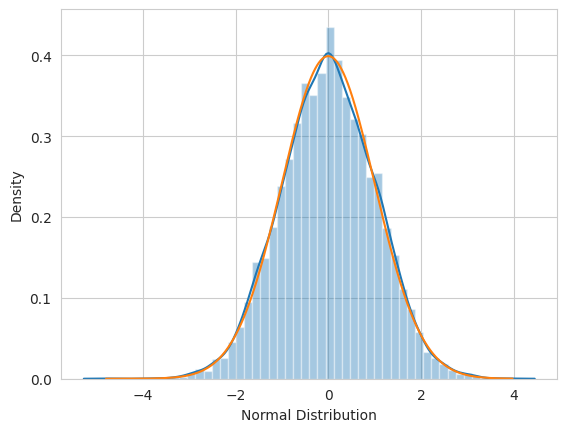

In [ ]:
mean = 0
std = 1
# generate random numbers from N(0,1)
# .rvs provides random samples; scale = std. deviation, loc = mean, size = no. of samples
data_normal = norm.rvs(size=10000,loc= mean,scale= std)
sns.distplot(data_normal)
df_n = pd.DataFrame({'x':data_normal})
df_n['P'] = df_n['x'].apply(lambda v: np.exp(-(((v - mean)/std)**2)/2)/(std*np.sqrt(2*np.pi)))  #see probability distribution function formula in text above
df_n = df_n.sort_values(by= 'x')
plt.plot(df_n['x'], df_n['P'], '-')
plt.xlabel('Normal Distribution')
plt.ylabel('Density')
plt.show()

In [ ]:
data_normal

array([-0.2149788 , -0.31610249,  0.87342182, ..., -0.70360383,
        0.38259444,  1.29961903])

In [ ]:
df_n

,x,P
7512,-4.796733,0.000004
7208,-3.850740,0.000240
6881,-3.574102,0.000671
2777,-3.345714,0.001480
4681,-3.309732,0.001668
...,...,...
4151,3.246947,0.002049
5598,3.260598,0.001960
6851,3.471624,0.000963
6274,3.649489,0.000511


### Binomial distribution

A distribution where only two outcomes are possible, such as success or failure, gain or loss, win or lose and where the probability of success and failure is the same for all the trials is called a binomial distribution. However, the outcomes need not be equally likely, and each trial is independent of the other. The most common example is that of flipping a coin n number of times and calculating the probabilities of getting a particular number of heads. More real-world examples include the number of successful sales calls for a company or whether a drug works for a disease or not.

The parameters of a binomial distribution are *n* and *p* where *n* is the total number of trials, and *p* is the probability of success in each trial. Its probability distribution function is given by :

### $f(k,n,p) = P(X=k) = \frac{n!}{k!(n-k)!} p^{k} (1-p)^{n-k}$

where, *k* is the number of times the success is achieved and lies in {0, 1,..., n}, also $ 0≤p≤1$.

**Exercise 2:** Consider an event where a fair coin is tossed 10 times and the total number of heads is recorded. Plot the distribution for the event.

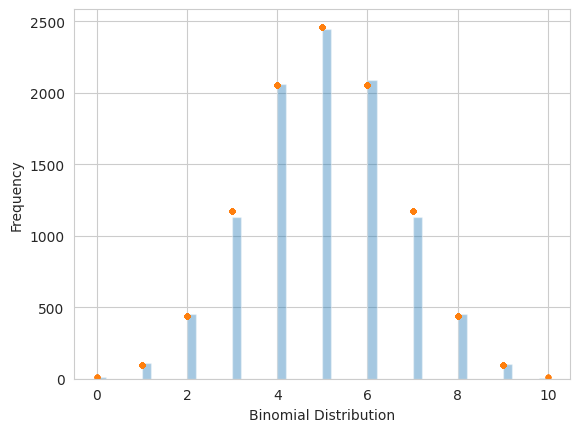

In [ ]:
# generate data
p = 1/2             # probability of getting a head
q = 1-p             # probability of getting a tail
n = 10              # total number of trials
data_binom = binom.rvs(n,p,size=10000)
# visualize data
sns.distplot(data_binom, kde=False)
df_b = pd.DataFrame({'x':data_binom})
df_b['P'] = df_b['x'].apply(lambda v: (math.factorial(n)/(math.factorial(n-v)*math.factorial(v)))*(p**v)*(q**(n-v)))
plt.plot(df_b['x'], 10000*df_b['P'], '.')
plt.xlabel('Binomial Distribution')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_binom

array([6, 7, 5, ..., 5, 4, 5])

In [ ]:
df_b

,x,P
0,6,0.205078
1,7,0.117188
2,5,0.246094
3,6,0.205078
4,8,0.043945
...,...,...
9995,5,0.246094
9996,5,0.246094
9997,5,0.246094
9998,4,0.205078


### Bernoulli distribution

A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. So the random variable *X*, which has a Bernoulli distribution, can take value 1 with the probability of success, *p*, and the value 0 with the probability of failure, *q* or *1−p*. The probabilities of success and failure need not be equally likely. The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted (*n*=1). Its probability mass function is given by:

### $f(k,p) = p^{k} (1-p)^{1-k}$

for $k$ in {0,1}, also $ 0≤p≤1$.

**Exercise 3:** Consider a random experiment of tossing a biased coin (having the probability of getting a head as 0.6) once. Plot the distribution associated with the event of getting heads in the given experiment if the process is repeated 10000 times.

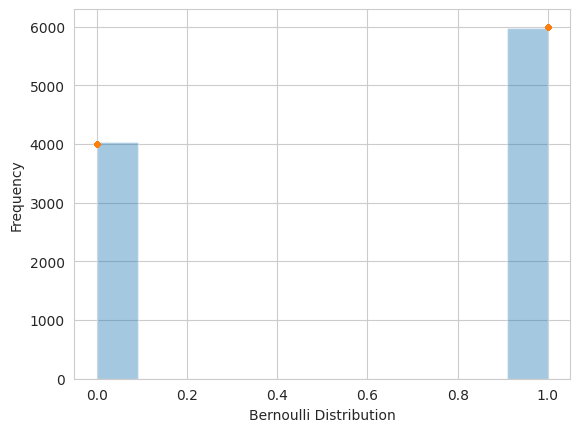

In [ ]:
# generate data
p=0.6                      # probability of getting a head
q=1-p                      # probability of getting a tail
data_bern = bernoulli.rvs(p,size=10000)
# visualize data
sns.distplot(data_bern, kde=False)
df_br = pd.DataFrame({'x':data_bern})
df_br['P'] = df_br['x'].apply(lambda v: (p**v)*(q**(1-v)))
plt.plot(df_br['x'], 10000*df_br['P'], '.')
plt.xlabel('Bernoulli Distribution')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_bern

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
df_br

,x,P
0,1,0.6
1,1,0.6
2,1,0.6
3,0,0.4
4,0,0.4
...,...,...
9995,1,0.6
9996,1,0.6
9997,1,0.6
9998,0,0.4


### Geometric distribution

The geometric distribution gives the probability that the first occurrence of success requires $k$ independent trials, each with success probability $p$. If the probability of success on each trial is $p$, then the probability that the $k^{th}$ trial (out of $k$ trials) will be the first success is given by:

$P(X=k) = (1-p)^{k-1}p$  
for $k$ = 1, 2, 3, ....

**Exercise 4:** Plot the geometric distribution of size 10000 having the probability of success as 0.5.

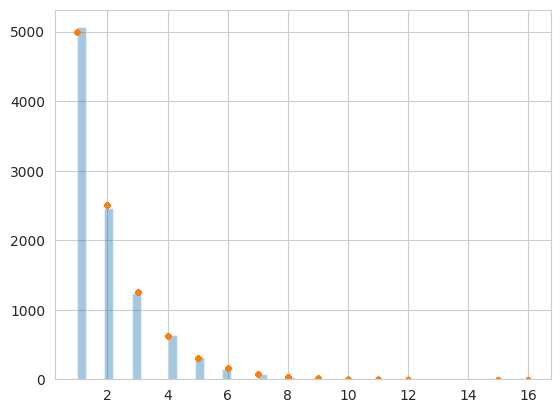

In [ ]:
# generate data
p = 0.5              # probability of success
q = 1-p              # probability of failure
data_geom = geometric(p, 10000)
sns.distplot(data_geom, kde= False)
df_g = pd.DataFrame({'x':data_geom})
df_g['P'] = df_g['x'].apply(lambda v: p*q**(v-1))
plt.plot(df_g['x'], 10000*df_g['P'], '.')
plt.show()

In [ ]:
data_geom

array([1, 1, 3, ..., 1, 2, 4])

In [ ]:
df_g

,x,P
0,1,0.5000
1,1,0.5000
2,3,0.1250
3,1,0.5000
4,1,0.5000
...,...,...
9995,1,0.5000
9996,2,0.2500
9997,1,0.5000
9998,2,0.2500


### Poisson distribution

Poisson random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of as a Poisson process. Poisson distribution is described in terms of the rate at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated as *λ*. Lambda(λ) is the event rate, also called the rate parameter. The probability of observing *k* events in an interval is given by the equation:

$$ P(k\ events\ in\ the\ interval) = \frac{e^{-λ}λ^k}{k!} $$

**Exercise 5:** Plot the poisson distribution having size 10000 and given rate parameter as 4.

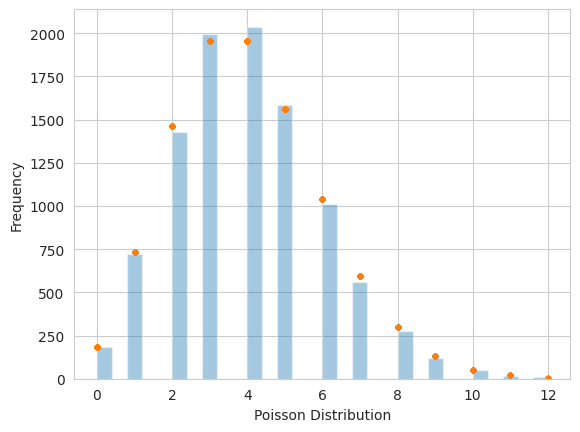

In [ ]:
# generate data
rate = 4
data_poisson = poisson.rvs(rate, size=10000)
# visualize data
sns.distplot(data_poisson, bins=30, kde= False)
df_p = pd.DataFrame({'x':data_poisson})
df_p['P'] = df_p['x'].apply(lambda v: (rate**v)*(np.e**(-rate))/math.factorial(v))
plt.plot(df_p['x'], 10000*df_p['P'], '.')
plt.xlabel('Poisson Distribution')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_poisson

array([8, 2, 5, ..., 3, 2, 6])

In [ ]:
df_p

,x,P
0,8,0.029770
1,2,0.146525
2,5,0.156293
3,4,0.195367
4,5,0.156293
...,...,...
9995,4,0.195367
9996,3,0.195367
9997,3,0.195367
9998,2,0.146525


### Uniform distribution

The probability distribution function of the continuous uniform distribution is:
$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &\frac{1}{b-a}&  for\  a≤x≤b\\
    &0&   for\  x<a\ or\ x>b\\
  \end{aligned}
  \right.
\end{equation}
$$

Since any interval of numbers of equal width has an equal probability of being observed, the curve describing the distribution is a rectangle, with constant height across the interval and 0 height elsewhere. Since the area under the curve must be equal to 1, the length of the interval determines the height of the curve. For a uniform distribution in the interval (a,b), the area needs to be 1 so the height is set to 1/(b−a).

**Exercise 6:** Plot the uniform distribution of size 10000 over the range {10,30}.

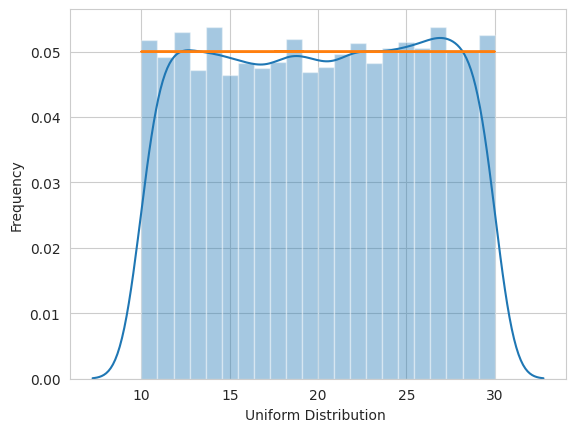

In [ ]:
# random numbers from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)
sns.distplot(data_uniform)
df_u = pd.DataFrame({'x':data_uniform})
df_u['P'] = df_u['x'].apply(lambda v: 1/(width))
plt.plot(df_u['x'], df_u['P'], '-')
plt.xlabel('Uniform Distribution ')
plt.ylabel('Frequency')
plt.show()

In [ ]:
data_uniform

array([19.16188223, 17.61029499, 18.11578145, ..., 20.88555111,
       27.68570063, 17.56831799])

In [ ]:
df_u

,x,P
0,19.161882,0.05
1,17.610295,0.05
2,18.115781,0.05
3,28.881245,0.05
4,13.843043,0.05
...,...,...
9995,21.529170,0.05
9996,25.824700,0.05
9997,20.885551,0.05
9998,27.685701,0.05


### Central Limit Theorem

Central Limit Theorem or CLT says that if the population has a mean μ and standard deviation σ and takes random samples from the population, the distribution of sample means starts getting normally distributed. The figure given below summarizes this point visually.
<figure>
<img src='https://cdn.iisc.talentsprint.com/CDS/Images/sampling_distribution_diagram.jpg' width=700 px />
</figure>

Sample mean is a random variable itself and thus has a probability distribution like any other random variable called the 'sampling distribution'. CLT helps us to figure out the parameters of the sampling distribution.

Suppose we take repeated samples of size *n* from a population with any kind of probability distribution. Then, the central limit theorem states that given a high enough sample size, the following properties hold true:
* sampling distribution's mean = Population mean *(μ)*, and
* sampling distribution's standard deviation = *σ/√n*, such that for n ≥ 30, where σ is population standard deviation

The central limit theorem allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference, i.e., confidence intervals and hypothesis tests.

To know more about the central limit theorem, click [here](https://blog.quantinsti.com/central-limit-theorem/#an-application-of-clt-in-investing-trading).

**Exercise 7:** Let's take a population that is exponentially distributed and check if CLT holds.

Exponential distribution is a continuous distribution that is often used to model the expected time one needs to wait before the occurrence of an event. The main parameter of exponential distribution is the 'rate' parameter *λ*, such that both mean and standard deviation of the distribution are given by *(1/λ)*. The following represents an exponentially distributed population:

$$f(x)=\begin{equation}
\left\{
  \begin{aligned}
    &λ e^{-λx}&  if\  x>0\\
    &0&   \  otherwise\\
  \end{aligned}
  \right.
\end{equation}
$$

Assuming λ=0.25, the mean and standard deviation of the population can be calculated.

In [ ]:
rate = 0.25     # rate parameter for the exponentially distributed population
mu = 1/rate     # population mean
sd = 1/rate     # population standard deviation
print('Population mean:', mu)
print('Population standard deviation:', sd)

Population mean: 4.0
Population standard deviation: 4.0


It can be seen that the distribution of population is far from the normal distribution.

<Axes: ylabel='Density'>

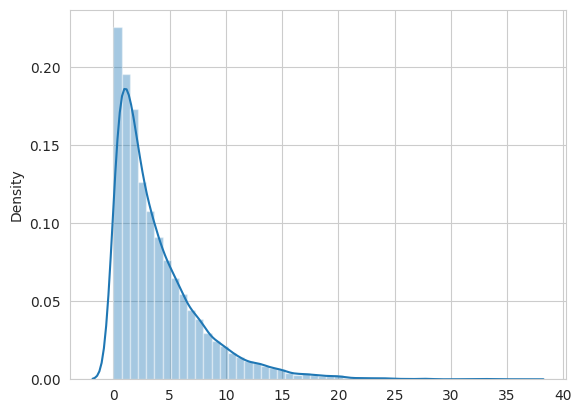

In [ ]:
# Visualize an exponential distribution having size= 10000
data = np.random.exponential((1/rate), 10000)
sns.distplot(data)

Now let's see how the sampling distribution looks for this population. Consider two cases, i.e. with a small sample size (n= 2), and a large sample size (n=500).

*Case 1:* Draw 50 random samples from the population of size 2 each.

In [ ]:
# Drawing 50 random samples of size 2 from the exponentially distributed population
sample_size = 2
df2 = pd.DataFrame(index= ['x1', 'x2'] )

for i in range(1, 51):
    exponential_sample = np.random.exponential(mu, sample_size)
    col = f'sample {i}'
    df2[col] = exponential_sample

# Take a look at the samples
df2

,sample 1,sample 2,sample 3,sample 4,sample 5,sample 6,sample 7,sample 8,sample 9,sample 10,...,sample 41,sample 42,sample 43,sample 44,sample 45,sample 46,sample 47,sample 48,sample 49,sample 50
x1,1.066645,0.991421,2.606761,3.441759,2.311264,0.277855,4.794455,2.926320,1.528940,0.812364,...,15.993847,7.382440,0.502405,7.301799,1.343249,4.180212,0.380807,14.34437,3.796748,4.853494
x2,3.397374,0.894595,0.768963,9.369610,5.816813,3.546222,8.849493,3.870394,5.162167,6.686778,...,0.852575,9.278826,7.804344,3.023815,2.186138,13.338940,7.737912,2.50366,0.247783,1.783540


<Axes: ylabel='Density'>

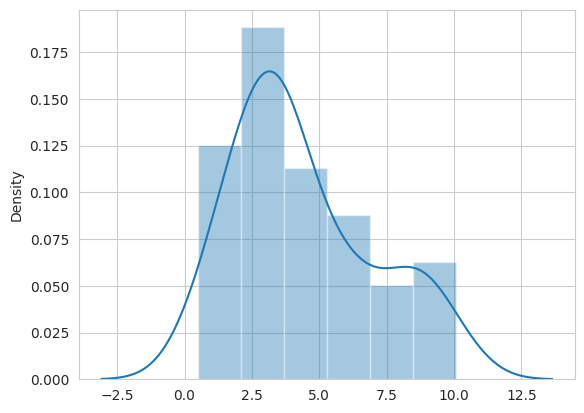

In [ ]:
# For each of the 50 samples, the sample mean and its distribution plot is given as
df2_sample_means = df2.mean()
sns.distplot(df2_sample_means)

It can be seen that even for a small sample size such as 2, the distribution of sample means looks very different from that of the exponential population and looks more like a poor approximation of a normal distribution.

*Case 2:* Repeat the above process with a much larger sample size (n=500):

<Axes: ylabel='Density'>

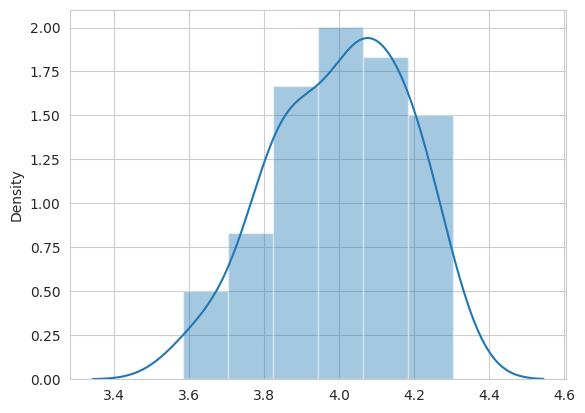

In [ ]:
# Drawing 50 random samples of size 500
sample_size=500
df500 = pd.DataFrame()

for i in range(1, 51):
    exponential_sample = np.random.exponential(mu, sample_size)
    col = f'sample {i}'
    df500[col] = exponential_sample

df500_sample_means = pd.DataFrame(df500.mean(),columns=['Sample means'])
sns.distplot(df500_sample_means)

The sampling distribution looks much more like a normal distribution when sampled with a much larger sample size (n=500).

In [ ]:
#The first 5 values from the 50 sample means
df500_sample_means.head()

,Sample means
sample 1,4.187084
sample 2,3.809876
sample 3,4.055765
sample 4,3.921549
sample 5,3.989597


In [ ]:
# An estimate of the standard deviation of the sampling distribution can be obtained as:
np.std(df500_sample_means).values[0]

0.17355625645963346

In [ ]:
# The above value is very close to the value stated by the CLT, which is σ/√n:
sd/ np.sqrt(sample_size)

0.17888543819998318

It can be observed that as the sample size increases from 2 to 500, the distribution of sample means increasingly starts resembling a normal distribution, with the mean given by the population mean *μ* and the standard deviation given by *(σ/√n)*, as stated by the Central Limit Theorem.

### Please answer the questions below to complete the experiment:




In [ ]:
# @title Select the True statement w.r.t the central limit theorem: { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "The distribution of a sample variable approximates a normal distribution as the sample size becomes larger, regardless of the population's actual distribution shape" #@param ["","The distribution of a sample variable approximates a normal distribution as the sample size becomes larger, regardless of the population's actual distribution shape","The distribution of a sample variable approximates a normal distribution as the sample size becomes larger, only if the population's original distribution shape was normal", "The distribution of a sample variable approximates a normal distribution as the sample size becomes larger, only if the population's original distribution shape was exponential"]